## POSTTEST 8 ##
## Jihan Nur Azizah ##
## 20009106081 ##

<h5> IMPORT LIBRARY <h5>

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as tfds
import numpy as np

<h5> MEMBACA DATA EMNIST <h5>

In [31]:
(train_x, train_y), (test_x, test_y) = tfds.mnist.load_data()
print(f'panjang x train: {len(train_x)} image',
      f'panjang y train: {len(train_y)} image',
      f'panjang x test: {len(test_x)} image',
      f'panjang y test: {len(test_y)} image',
      sep = '\n'
     )

11490434/11490434 [==============================] - 12s 1us/step
panjang x train: 60000 image
panjang y train: 60000 image
panjang x test: 10000 image
panjang y test: 10000 image


<h5> Di sini saya menetapkan jumlah kelas (sesuaikan dengan jumlah kelas yang dimiliki dataset) <h5>

In [32]:
num_class = 10
train_y = tf.keras.utils.to_categorical(train_y, num_class)
test_y = tf.keras.utils.to_categorical(test_y, num_class)

In [33]:
testing_x = test_x.copy()

<h5> Menampilkan image dari dataset <h5>

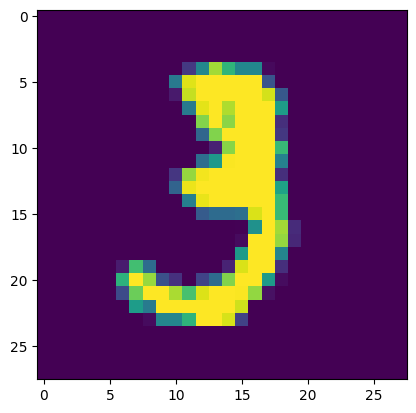

In [35]:
plt.imshow(train_x[10])

<h5> Melakukan Reshaping <h5>

In [37]:
train_x = train_x.reshape(60000, 784)
test_x = test_x.reshape(10000, 784)

In [39]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

<h5> Membuat model dengan sequential model <h5>

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_dim = 784),
    tf.keras.layers.Dense(num_class, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


<h5> Mengcompile Model <h5>

In [41]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

<h5> Training Model <h5>

In [43]:
history = model.fit(
    x = train_x, y= train_y,
    validation_data = (test_x, test_y),
    epochs = 5,
    steps_per_epoch = 1000,
    verbose = 1
)

Epoch 1/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1462 - accuracy: 0.9574 - val_loss: 0.1417 - val_accuracy: 0.9568
Epoch 2/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1240 - accuracy: 0.9640 - val_loss: 0.1265 - val_accuracy: 0.9626
Epoch 3/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1090 - accuracy: 0.9680 - val_loss: 0.1150 - val_accuracy: 0.9664
Epoch 4/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0977 - accuracy: 0.9722 - val_loss: 0.1108 - val_accuracy: 0.9666
Epoch 5/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0890 - accuracy: 0.9750 - val_loss: 0.1100 - val_accuracy: 0.9673


<h5> Save Model <h5>

In [47]:
model.save('model/model1.h5')

In [48]:
saved_model = tf.keras.models.load_model('model/model1.h5')